## 0. Setup

In [1]:
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("..")

import arcadia_pycolor as apc

apc.mpl.setup()

## 1. Load Data

In [2]:
num_reads = [
    1_500_000,
    1_200_000,
    1_000_000,
    400_000,
    1_000_000,
    1_700_000,
    1_300_000,
    600_000,
    1_200_000,
    1_500_000,
    1_600_000,
    300_000,
    900_000,
    1_700_000,
    800_000,
]

sample_id = [
    "AL 4M",
    "EL 2W",
    "EL 4W",
    "EL 4W WGA",
    "EL 12W",
    "OM 2W",
    "OM 4W",
    "OM 4W WGA",
    "OM 8W",
    "WH 1M",
    "WH 2M",
    "WH 2M WGA",
    "WH 4M",
    "WH 2M Hous",
    "WI 3W",
]

error = [
    100000,
    80000,
    70000,
    30000,
    70000,
    120000,
    90000,
    40000,
    80000,
    100000,
    110000,
    20000,
    60000,
    120000,
    50000,
]

## 2. Vertical bar chart using `matplotlib`

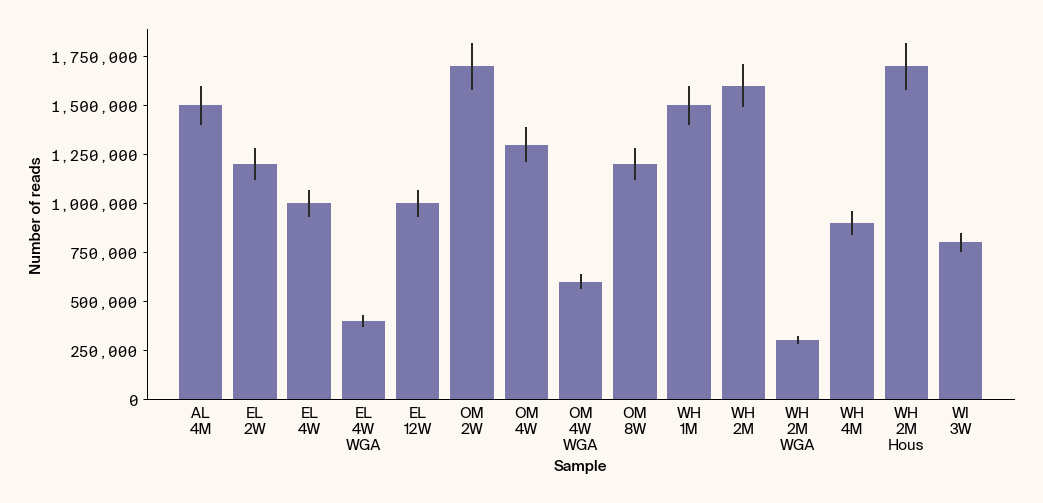

In [3]:
fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("threeq_wide"), layout="constrained")

sample_id_formatted = [i.replace(" ", "\n") for i in sample_id]
plt.bar(sample_id_formatted, num_reads, color=apc.aster)

apc.mpl.style_axis(ax, monospaced_axes="y")
apc.mpl.set_xaxis_categorical()

ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ",")))

# Remove this if you don't want error bars.
plt.errorbar(sample_id_formatted, num_reads, yerr=error, fmt="none", color=apc.crow)

plt.ylabel("Number of reads")
plt.xlabel("Sample")
plt.show()

## 3. Horizontal bar chart using `matplotlib`

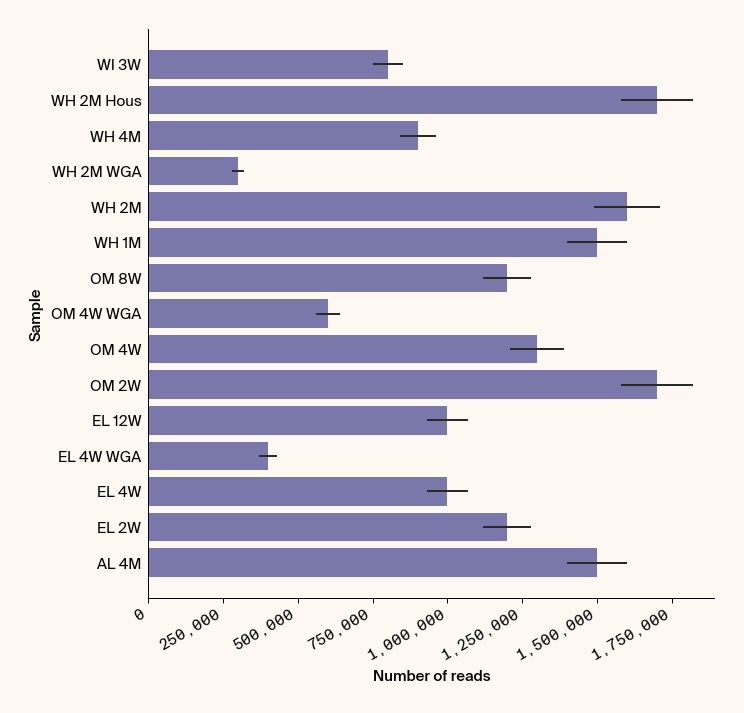

In [4]:
fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("half_small"), layout="constrained")
plt.barh(sample_id, num_reads, color=apc.aster)

apc.mpl.style_axis(ax, monospaced_axes="x")
apc.mpl.set_yaxis_categorical()

ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ",")))
plt.xticks(rotation=30, ha="right")

# Remove this if you don't want error bars.
plt.errorbar(num_reads, sample_id, xerr=error, fmt="none", color=apc.crow)

plt.xlabel("Number of reads")
plt.ylabel("Sample")
plt.show()

## 4. Vertical bar chart using `seaborn`

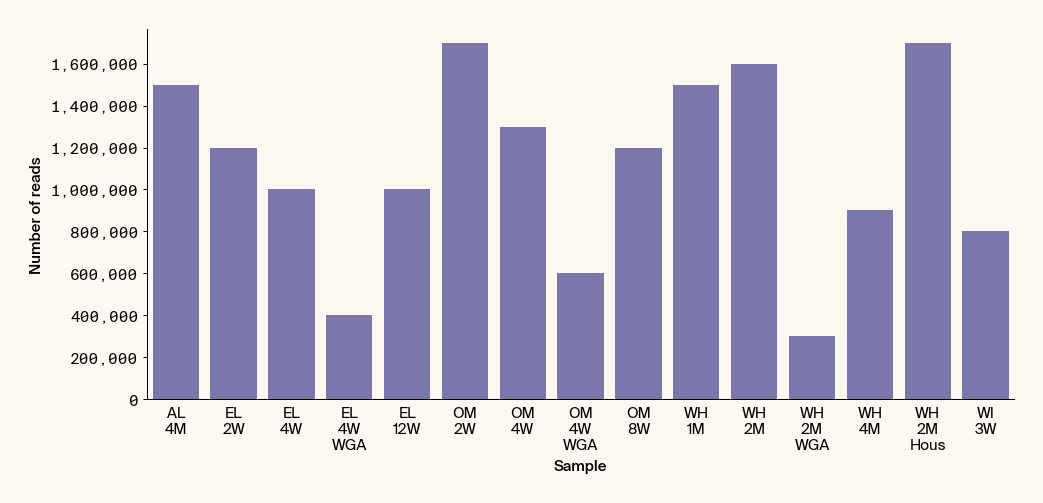

In [5]:
fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("threeq_wide"), layout="constrained")
sns.barplot(
    x=sample_id_formatted,
    y=num_reads,
    color=apc.aster,
    saturation=1,  # Seaborn by default desaturates the colors. This prevents that.
)

apc.mpl.style_axis(ax, monospaced_axes="y")
apc.mpl.set_xaxis_categorical()

ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ",")))

plt.ylabel("Number of reads")
plt.xlabel("Sample")
plt.show()

## 5. Horizontal bar chart using `seaborn`

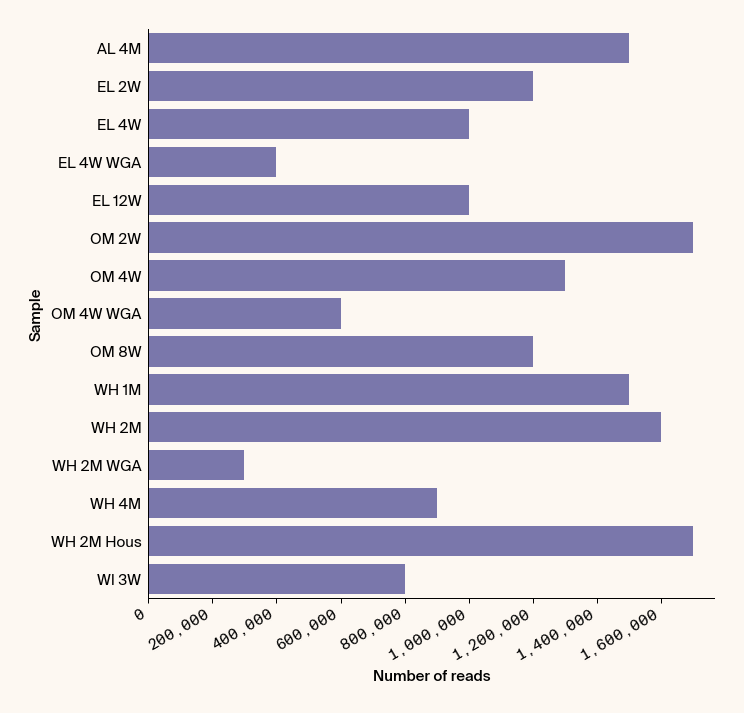

In [6]:
fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("half_small"), layout="constrained")
sns.barplot(
    y=sample_id,
    x=num_reads,
    color=apc.aster,
    saturation=1,  # Seaborn by default desaturates the colors. This prevents that.
)

apc.mpl.style_axis(ax, monospaced_axes="x")
apc.mpl.set_yaxis_categorical()

ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ",")))

plt.xticks(rotation=30, ha="right")

plt.xlabel("Number of reads")
plt.ylabel("Sample")
plt.show()

# 6. Bar chart with colored categories using `matplotlib`

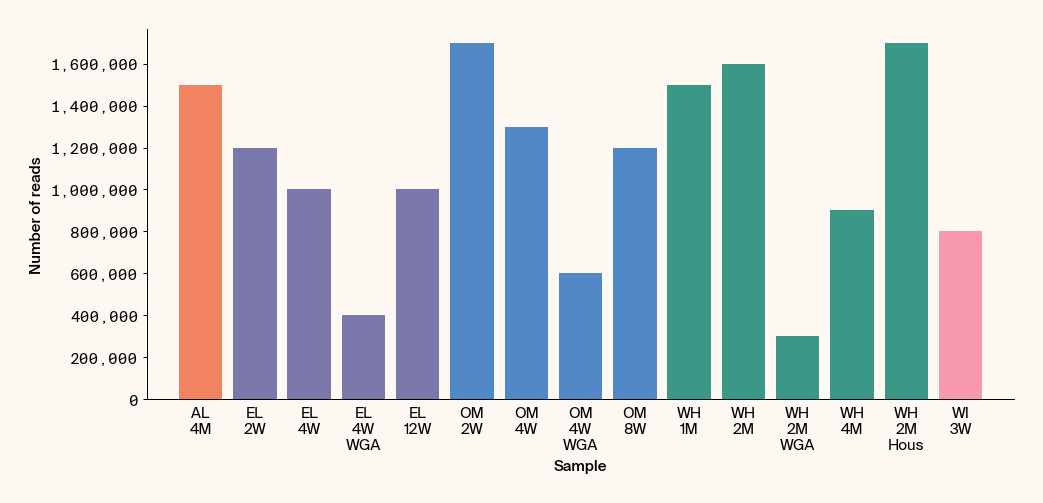

In [7]:
fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("threeq_wide"), layout="constrained")

color_labels = [idx.split(" ")[0] for idx in sample_id]
color_dict = dict(zip(set(color_labels), [apc.aster, apc.aegean, apc.amber, apc.seaweed, apc.rose]))

colors = [dict(color_dict)[i] for i in color_labels]

sample_id_formatted = [i.replace(" ", "\n") for i in sample_id]
plt.bar(sample_id_formatted, num_reads, color=colors)

apc.mpl.style_axis(ax, monospaced_axes="y")
apc.mpl.set_xaxis_categorical()

ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ",")))

plt.ylabel("Number of reads")
plt.xlabel("Sample")
plt.show()

# 7. Bar chart with colored categories using `seaborn`

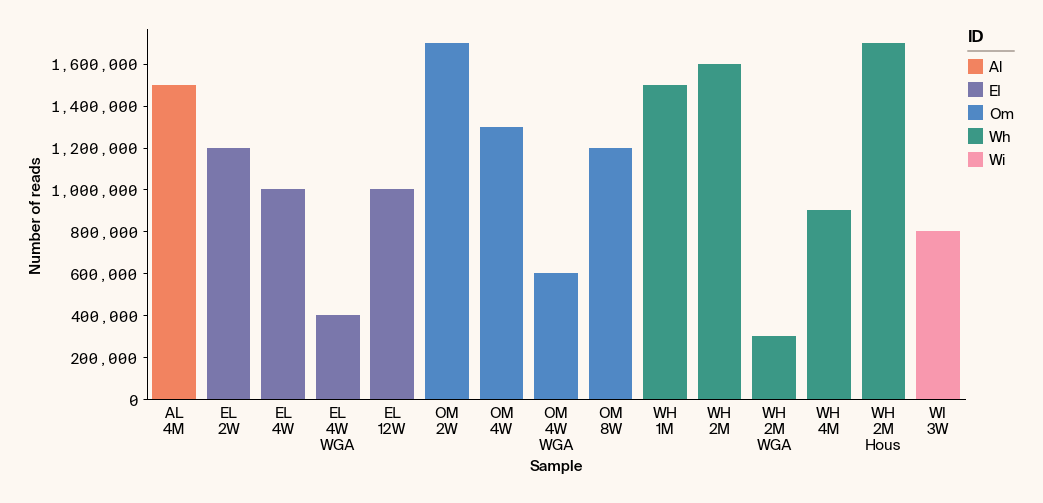

In [8]:
fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("threeq_wide"), layout="constrained")

color_labels = [idx.split(" ")[0] for idx in sample_id]
color_dict = dict(zip(set(color_labels), [apc.aster, apc.aegean, apc.amber, apc.seaweed, apc.rose]))

sns.barplot(
    x=sample_id_formatted,
    y=num_reads,
    hue=color_labels,
    palette=color_dict,
    saturation=1,  # Seaborn by default desaturates the colors. This prevents that.
)

apc.mpl.style_axis(ax, monospaced_axes="y")
apc.mpl.set_xaxis_categorical()

ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ",")))

plt.ylabel("Number of reads")
plt.xlabel("Sample")

legend = ax.get_legend()
legend.set_title("ID")

legend.set_bbox_to_anchor((1.06, 1))

plt.show()